<a href="https://colab.research.google.com/github/sooeun67/DeepLearning/blob/master/CIFAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import keras
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# from scipy.spatial.distance import cosine 

Using TensorFlow backend.


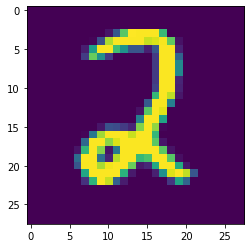

In [0]:
import tensorflow.compat.v2 as tf
import tensorflow_datasets as tfds

# tfds works in both Eager and Graph modes
tf.enable_v2_behavior()
# Construct a tf.data.Dataset
ds = tfds.load('mnist', split='train', shuffle_files=True)

# Build your input pipeline
ds = ds.shuffle(1024).batch(32).prefetch(tf.data.experimental.AUTOTUNE)
for example in ds.take(1):
    image, label = example["image"], example["label"]
    plt.imshow(image.numpy()[0].reshape(28,28))

In [0]:
cifar10_builder = tfds.builder("cifar10")
cifar10_builder.download_and_prepare()
ds_train = cifar10_builder.as_dataset(split="train")
ds_test = cifar10_builder.as_dataset(split="test")

In [0]:
ds_train.output_shapes

ds_train[0].numpy()[0]
for example in ds.take(1):
    image, label = example["image"], example["label"]
    plt.imshow(image.numpy()[0].reshape(28,28))

TypeError: ignored

In [0]:
# dataset / dataset.take 타입이 같음 (~= SQL limit이랑 비슷)
# ds_train은 iterator이지만 list가 아닐 수 있기 때문에, list로 감싸서 indexing이 가능하게 만들어준다.

list(ds_train.take(1))[0]['image'].numpy().shape

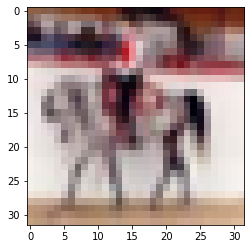

In [0]:
plt.imshow(list(ds_train.take(1))[0]['image'].numpy())

In [0]:
#ds_train
#[ { 'image': tf.Tensor, 'label': text }, ...                                    ]

# [list(ds_train)[i]['image'].numpy() for i in range(len(ds_train))]

l = ['a', 'b', 'c', 'd', 'e']
for character in l:
  character # 'a'

for i in range(len(l)):
  i # 0 

[elem['image'].numpy() for elem in ds_train]

[array([[[143,  96,  70],
         [141,  96,  72],
         [135,  93,  72],
         ...,
         [ 96,  37,  19],
         [105,  42,  18],
         [104,  38,  20]],
 
        [[128,  98,  92],
         [146, 118, 112],
         [170, 145, 138],
         ...,
         [108,  45,  26],
         [112,  44,  24],
         [112,  41,  22]],
 
        [[ 93,  69,  75],
         [118,  96, 101],
         [179, 160, 162],
         ...,
         [128,  68,  47],
         [125,  61,  42],
         [122,  59,  39]],
 
        ...,
 
        [[187, 150, 123],
         [184, 148, 123],
         [179, 142, 121],
         ...,
         [198, 163, 132],
         [201, 166, 135],
         [207, 174, 143]],
 
        [[187, 150, 117],
         [181, 143, 115],
         [175, 136, 113],
         ...,
         [201, 164, 132],
         [205, 168, 135],
         [207, 171, 139]],
 
        [[195, 161, 126],
         [187, 153, 123],
         [186, 151, 128],
         ...,
         [212, 177, 147],
  

In [0]:
train_images = np.array([elem['image'].numpy() for elem in ds_train]) / 255 # normalize
train_labels = np.array([elem['label'].numpy() for elem in ds_train])
test_images = np.array([elem['image'].numpy() for elem in ds_test]) / 255 # normalize
test_labels = np.array([elem['label'].numpy() for elem in ds_test])

In [0]:
from tensorflow.python.framework.ops import disable_eager_execution
disable_eager_execution()

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(np.array(train_images) / 255, np.array(train_labels), epochs=50)  # we pass the data, labels and epochs and watch the magic!



# test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

# print('Test accuracy:', test_acc)

Epoch 1/50
50000/50000 [==============================] - 13s 265us/step - loss: 2.0441 - acc: 0.2644
Epoch 2/50
50000/50000 [==============================] - 13s 260us/step - loss: 1.8880 - acc: 0.3277
Epoch 3/50
50000/50000 [==============================] - 13s 264us/step - loss: 1.8321 - acc: 0.3523
Epoch 4/50
50000/50000 [==============================] - 13s 259us/step - loss: 1.7892 - acc: 0.3662
Epoch 5/50
50000/50000 [==============================] - 13s 264us/step - loss: 1.7534 - acc: 0.3790
Epoch 6/50
50000/50000 [==============================] - 13s 254us/step - loss: 1.7226 - acc: 0.3885
Epoch 7/50
50000/50000 [==============================] - 13s 267us/step - loss: 1.6957 - acc: 0.3969
Epoch 8/50
50000/50000 [==============================] - 13s 261us/step - loss: 1.6720 - acc: 0.4077
Epoch 9/50
50000/50000 [==============================] - 13s 256us/step - loss: 1.6511 - acc: 0.4164
Epoch 10/50
50000/50000 [==============================] - 13s 263us/step - loss: 

In [0]:
predictions = model.predict(test_images)
predictions[0]
np.argmax(predictions[0])
test_labels[0]

7

In [0]:
predictions = model.predict(test_images)
predictions[0]
np.argmax(predictions[0])

5

In [0]:
test_labels[0]

7

In [0]:
np.mean(test_labels == np.argmax(predictions, axis=1))

0.1959